<a href="https://colab.research.google.com/github/johnrua17/I.B-Lab/blob/main/I_B_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-6b5fd15123cc>:27: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  binary_code = [np.binary_repr(int((x - min_val) / step_size), bits_per_sample) for x in quantized]


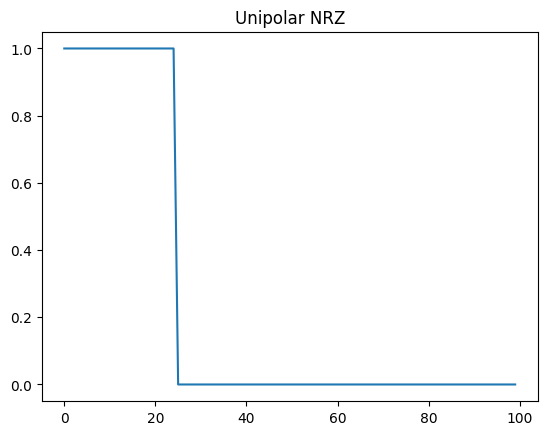

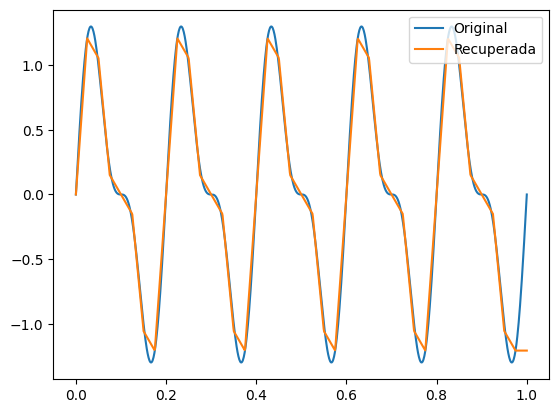

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Definición de la señal m(t)
t = np.linspace(0, 1, 1000)  # Tiempo continuo
f1, f2 = 5, 10               # Frecuencias de las sinusoides
m_t = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Muestreo
fs = 40  # Frecuencia de muestreo (fs >= 2*fM)
ts = 1 / fs
n = np.arange(0, 1, ts)
samples = np.sin(2 * np.pi * f1 * n) + 0.5 * np.sin(2 * np.pi * f2 * n)



# Cuantización uniforme
L = 16  # Número de niveles de cuantización
min_val, max_val = min(samples), max(samples)
step_size = (max_val - min_val) / L
quantized = np.round((samples - min_val) / step_size) * step_size + min_val


# Codificación binaria
bits_per_sample = int(np.ceil(np.log2(L)))
binary_code = [np.binary_repr(int((x - min_val) / step_size), bits_per_sample) for x in quantized]


# Ejemplo: Unipolar NRZ
def unipolar_nrz(codes, ts):
    signal = []
    for bit in codes:
        for b in bit:
            signal.extend([1 if b == '1' else 0] * int(ts * 1000))
    return signal

signal = unipolar_nrz(binary_code, ts)
plt.plot(signal[:100])  # Graficar los primeros 100 bits
plt.title("Unipolar NRZ")
plt.show()


# Reconstrucción de la señal
def reconstruct_signal(quantized, fs, t):
    return np.interp(t, n, quantized)

recovered_signal = reconstruct_signal(quantized, fs, t)
plt.plot(t, m_t, label="Original")
plt.plot(t, recovered_signal, label="Recuperada")
plt.legend()
plt.show()
